In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
data = pd.read_pickle('initial_data.pickle')

In [5]:
data['day_of_the_week'] = data.time.dt.dayofweek

In [6]:
%matplotlib inline

In [7]:
data['forward_premia'] = ((data['total_lmp_rt'] - data['total_lmp_da']) / data['total_lmp_da'])*100

In [8]:
data_weekdays = data[data['day_of_the_week'] < 5]

In [9]:
data_weekends = data[data['day_of_the_week'] > 4]

### First going for the weekend data to see if there is any chance of arbitage

In [10]:
## Grouping the data based on their pnode_id
grouped_weekends_by_pid = data_weekends.groupby('pnode_id')

In [82]:
# Trying
medians = grouped_weekends_by_pid.forward_premia.median()

In [83]:
medians

pnode_id
1            -3.917783
51205        -9.123267
51206        -1.992331
51211        -1.581087
51214        -2.172369
51215        -1.236312
51216        -6.073992
51217        -4.176244
51218        -3.270844
51219        -3.210749
51220        -1.160954
51221        -1.788889
51229        -2.989633
51230        -2.951072
51231        -3.000404
51232        -3.057632
51238        -1.651563
51239        -1.550195
51240        -2.810857
51241        -1.924644
51246        -3.824834
51252        -2.214681
51255        -2.771070
51261        -1.731526
51262        -1.357168
51264        -1.804309
51265        -1.804309
51266        -1.804309
51267        -1.804309
51270        -1.838161
                ...   
116472955    -1.627654
116472957    -2.607903
116472959    -2.532377
123905887    -3.537858
124076095    -4.305468
126769999    -3.052235
128774185    -4.442965
128774205    -4.173497
130204739    -4.063559
130204741    -4.769521
135681231    -2.821574
970242670    -3.510880
10

In [84]:
medians_df = pd.DataFrame(medians)

In [85]:
medians_df.sort_values(by='forward_premia')

,forward_premia
pnode_id,
79463693,-11.877231
79463695,-11.861420
51205,-9.123267
33092305,-8.881229
51292,-8.281199
116472933,-7.833515
51285,-7.013028
52469,-6.952412
52447,-6.809625


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000181866227B8>]], dtype=object)

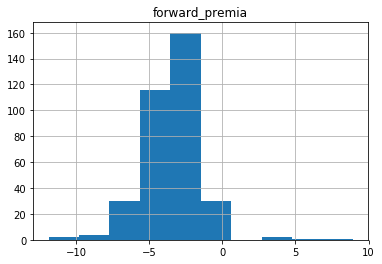

In [86]:
medians_df.hist()

In [14]:
quantiles = grouped_weekends_by_pid.forward_premia.quantile([0,0.25,0.5,0.75,1])

C:\Users\Gaurav Ahlawat\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


# Calculating Quantiles

In [17]:
quantiles

pnode_id        
1           0.00    -2589.304872
            0.25      -12.407510
            0.50       -3.917783
            0.75        4.547329
            1.00      475.847208
51205       0.00    -2102.345786
            0.25      -22.092876
            0.50       -9.123267
            0.75        5.403075
            1.00      947.397676
51206       0.00   -19183.333333
            0.25      -15.211502
            0.50       -1.992331
            0.75       12.136706
            1.00     1832.894737
51211       0.00   -16400.000000
            0.25      -15.207628
            0.50       -1.581087
            0.75       12.931242
            1.00     3036.956522
51214       0.00   -38766.666667
            0.25      -18.323157
            0.50       -2.172369
            0.75       14.126353
            1.00     7468.421053
51215       0.00   -15609.337883
            0.25      -15.932715
            0.50       -1.236312
            0.75       14.283538
            1.00     5360.

In [26]:
quantiles_0 = grouped_weekends_by_pid.forward_premia.quantile(0)

In [53]:
quantiles_0 = quantiles_0.rename('0_quantile')

In [45]:
quantiles_0

pnode_id
1            -2.589305e+03
51205        -2.102346e+03
51206        -1.918333e+04
51211        -1.640000e+04
51214        -3.876667e+04
51215        -1.560934e+04
51216        -3.471005e+03
51217        -2.196109e+07
51218        -3.677734e+03
51219        -3.176485e+03
51220        -6.040102e+03
51221        -3.880351e+03
51229        -2.589498e+03
51230        -2.595485e+03
51231        -2.586742e+03
51232        -2.586292e+03
51238        -3.301481e+03
51239        -1.274444e+04
51240        -3.774912e+03
51241        -3.277941e+03
51246        -2.604237e+03
51252        -3.250837e+03
51255        -2.484124e+03
51261        -1.272222e+04
51262        -3.240716e+03
51264        -3.243000e+03
51265        -3.243000e+03
51266        -3.243000e+03
51267        -3.243000e+03
51270        -3.236160e+03
                  ...     
116472955    -3.250950e+03
116472957    -3.278736e+03
116472959    -3.177992e+03
123905887    -2.456832e+03
124076095    -1.485485e+04
126769999    -2.188

In [58]:
quantiles_25 = grouped_weekends_by_pid.forward_premia.quantile(0.25)
quantiles_25 = quantiles_25.rename('25_quantile')
quantiles_5 = grouped_weekends_by_pid.forward_premia.quantile(0.5)
quantiles_5 =quantiles_5.rename('5_quantile')
quantiles_75 = grouped_weekends_by_pid.forward_premia.quantile(0.75)
quantiles_75 =quantiles_75.rename('75_quantile')
quantiles_1 = grouped_weekends_by_pid.forward_premia.quantile(1)
quantiles_1 =quantiles_1.rename('1_quantile')

C:\Users\Gaurav Ahlawat\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


In [59]:
frame = [quantiles_0, quantiles_25, quantiles_5, quantiles_75, quantiles_1]

In [60]:
quantiles_data = pd.concat(frame, axis=1)

In [61]:
quantiles_data

,0_quantile,25_quantile,5_quantile,75_quantile,1_quantile
pnode_id,,,,,
1,-2.589305e+03,-12.407510,-3.917783,4.547329,475.847208
51205,-2.102346e+03,-22.092876,-9.123267,5.403075,947.397676
51206,-1.918333e+04,-15.211502,-1.992331,12.136706,1832.894737
51211,-1.640000e+04,-15.207628,-1.581087,12.931242,3036.956522
51214,-3.876667e+04,-18.323157,-2.172369,14.126353,7468.421053
51215,-1.560934e+04,-15.932715,-1.236312,14.283538,5360.304442
51216,-3.471005e+03,-22.878986,-6.073992,10.568905,18906.676394
51217,-2.196109e+07,-19.689179,-4.176244,11.629781,4769.584895
51218,-3.677734e+03,-20.706067,-3.270844,13.503200,58550.000000


In [69]:
quantiles_data['25_quantile'].sort_values()

pnode_id
33092305     -31.606602
79463693     -28.510656
79463695     -28.509944
292885       -25.273704
466543       -25.032267
292899       -24.403927
93154        -23.253096
51216        -22.878986
32559379     -22.594446
615760       -22.327099
51280        -22.160949
51205        -22.092876
33138787     -21.848412
116472933    -20.799885
51218        -20.706067
51293        -20.558192
51292        -20.454473
116472941    -19.962585
32496875     -19.833007
51217        -19.689179
41935495     -18.994946
1124361945   -18.432293
51214        -18.323157
4665063      -18.209208
51240        -18.146706
1082063      -18.142360
51285        -17.897505
659784       -17.762980
1304468347   -17.743902
52469        -17.712762
                ...    
34509189     -11.204977
34509217     -11.178798
34509197     -11.178146
34497125     -11.137255
34509185     -11.124301
63381461     -11.102880
33097335     -11.054824
1127872598   -11.046997
33108561     -11.035536
70870837     -10.984284
3313874

In [35]:
quantiles_data.rename(columns={'forward_premia':'0 quantile','forward_premia':'0.25 quantile','forward_premia':'Median','forward_premia':'0.75 quantile','forward_premia':'1 quantile'})

,1 quantile,1 quantile,1 quantile,1 quantile,1 quantile
pnode_id,,,,,
1,-2.589305e+03,-12.407510,-3.917783,4.547329,475.847208
51205,-2.102346e+03,-22.092876,-9.123267,5.403075,947.397676
51206,-1.918333e+04,-15.211502,-1.992331,12.136706,1832.894737
51211,-1.640000e+04,-15.207628,-1.581087,12.931242,3036.956522
51214,-3.876667e+04,-18.323157,-2.172369,14.126353,7468.421053
51215,-1.560934e+04,-15.932715,-1.236312,14.283538,5360.304442
51216,-3.471005e+03,-22.878986,-6.073992,10.568905,18906.676394
51217,-2.196109e+07,-19.689179,-4.176244,11.629781,4769.584895
51218,-3.677734e+03,-20.706067,-3.270844,13.503200,58550.000000


In [71]:
quantiles_data['5_quantile'].sort_values()

pnode_id
79463693     -11.877231
79463695     -11.861420
51205         -9.123267
33092305      -8.881229
51292         -8.281199
116472933     -7.833515
51285         -7.013028
52469         -6.952412
52447         -6.809625
338268        -6.804050
338269        -6.777078
51298         -6.772198
52448         -6.744161
338270        -6.736327
52445         -6.650591
52446         -6.551786
93154         -6.131729
1288248099    -6.130584
51216         -6.073992
466543        -6.034746
292885        -6.015535
292899        -6.014485
18862527      -5.996789
5022435       -5.986104
22465574      -5.981083
12580877      -5.978948
27677106      -5.964264
34509199      -5.876740
35010371      -5.862726
19623499      -5.859204
                ...    
33097335      -1.328929
4665060       -1.322973
52461         -1.316577
51297         -1.311194
37420969      -1.296453
67165681      -1.286892
33097339      -1.279711
52454         -1.243461
51215         -1.236312
52464         -1.209068
52458  

In [72]:
quantiles_data['75_quantile'].sort_values()

pnode_id
34509199       2.889203
130204741      3.082162
1269364672     3.141880
124076095      3.176082
128774185      3.246777
35079889       3.265451
130204739      3.401047
8445784        3.407511
1269364671     3.443053
47330703       3.547152
1072629098     3.671221
34509949       3.678209
51287          3.690056
35010379       3.699933
35010383       3.737741
35079887       3.742088
116472931      3.744721
34497181       3.746589
8394954        3.770027
128774205      3.777390
35024709       3.777479
51288          3.777651
5022431        3.783499
40817521       3.787966
115944313      3.791956
34497127       3.793228
34508503       3.802731
19623499       3.836686
115944315      3.836956
115944303      3.855896
                ...    
51218         13.503200
52461         13.714857
52463         13.782678
67165681      13.796504
1080786       13.817470
52458         13.818500
33138787      13.822550
4665060       13.825088
734134        13.827477
51262         13.858194
52454  

In [73]:
quantiles_data['1_quantile'].sort_values()

pnode_id
1269364670    3.760585e+02
1282935158    3.766914e+02
1269364674    3.838174e+02
116472931     3.881966e+02
1269364671    3.888833e+02
1127872598    3.900196e+02
1258625176    3.968403e+02
116472943     4.043485e+02
1069452904    4.245193e+02
126769999     4.250925e+02
34497127      4.365056e+02
34509945      4.369220e+02
47330703      4.508496e+02
8445784       4.549472e+02
40817521      4.550896e+02
35010387      4.575379e+02
53178721      4.619966e+02
41120187      4.624982e+02
35010375      4.671303e+02
128774185     4.718628e+02
51288         4.734609e+02
1             4.758472e+02
124076095     4.773906e+02
34497125      4.776467e+02
35079889      4.785931e+02
130204741     4.801272e+02
51287         4.806521e+02
34509217      4.817757e+02
35010379      4.819554e+02
34509949      4.835586e+02
                  ...     
33138733      2.211429e+04
15590289      2.330000e+04
32559379      2.356000e+04
51297         2.365860e+04
51296         2.470713e+04
116472941     2.496

# So, for the weekends, one cannot divide the electricity markets into three regions. There is only one region, with every node having values below 0 and above 0 and no node with explicitly positive or negative values

# Now, let's try the weekdays data to see if arbitrage possible

In [74]:
grouped_weekdays_by_pid = data_weekdays.groupby('pnode_id')

In [75]:
medians = grouped_weekdays_by_pid.forward_premia.median()

In [78]:
medians_df = pd.DataFrame(medians)

In [80]:
medians_df.sort_values(by='forward_premia')

,forward_premia
pnode_id,
79463693,-13.131541
79463695,-13.127834
33092305,-13.002263
51205,-10.983711
51292,-10.537465
116472933,-10.337543
34509199,-9.767533
292899,-9.665703
51216,-9.663529


## Almost same medians as in weekends

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018186645710>]], dtype=object)

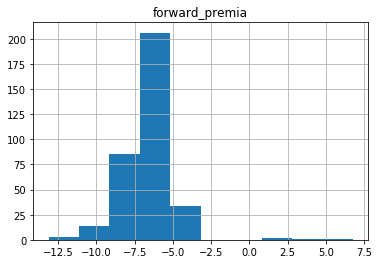

In [81]:
medians_df.hist()

In [87]:
quantiles_0 = grouped_weekdays_by_pid.forward_premia.quantile(0)
quantiles_0 = quantiles_0.rename('0_quantile')
quantiles_25 = grouped_weekdays_by_pid.forward_premia.quantile(0.25)
quantiles_25 = quantiles_25.rename('25_quantile')
quantiles_5 = grouped_weekdays_by_pid.forward_premia.quantile(0.5)
quantiles_5 =quantiles_5.rename('5_quantile')
quantiles_75 = grouped_weekdays_by_pid.forward_premia.quantile(0.75)
quantiles_75 =quantiles_75.rename('75_quantile')
quantiles_1 = grouped_weekdays_by_pid.forward_premia.quantile(1)
quantiles_1 =quantiles_1.rename('1_quantile')

C:\Users\Gaurav Ahlawat\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


In [88]:
frame = [quantiles_0, quantiles_25, quantiles_5, quantiles_75, quantiles_1]
quantiles_data = pd.concat(frame, axis=1)
quantiles_data

,0_quantile,25_quantile,5_quantile,75_quantile,1_quantile
pnode_id,,,,,
1,-1559.471136,-16.090770,-6.560726,2.229271,550.558280
51205,-1258.749122,-24.438774,-10.983711,2.861328,1851.801536
51206,-4944.791667,-19.244651,-5.614312,6.691558,932.592593
51211,-5057.894737,-19.333636,-5.351742,7.327757,1580.487805
51214,-4915.577889,-23.780558,-7.788192,6.205672,4090.909091
51215,-6392.624460,-20.583491,-5.783946,7.581870,2103.647788
51216,-4612.044606,-26.242586,-9.663529,4.927456,2219.175707
51217,-4822.896787,-22.930292,-8.065411,5.743789,2471.938082
51218,-6562.804878,-25.837595,-8.444675,6.721465,3088.636364


In [89]:
quantiles_data['25_quantile'].sort_values()

pnode_id
33092305     -34.816868
79463693     -28.927807
79463695     -28.917666
33138787     -28.113104
292899       -27.723625
615760       -26.843614
466543       -26.841456
32559379     -26.737277
292885       -26.413601
51216        -26.242586
93154        -26.067723
51218        -25.837595
51280        -25.608264
51205        -24.438774
32496875     -24.306787
51293        -24.077353
51292        -23.848782
51214        -23.780558
41935495     -23.720254
116472933    -23.707651
116472941    -23.024901
51217        -22.930292
1082063      -22.883648
4665063      -22.842830
1304468347   -22.668932
1124361945   -22.591518
51285        -21.803130
41935499     -21.753904
51240        -21.308677
338270       -21.262970
                ...    
33138749     -15.295307
33138751     -15.295307
43653269     -15.261944
34983445     -15.256282
52450        -15.250370
54468983     -15.226130
37420969     -15.206661
1076374013   -15.193129
1258625176   -15.186985
1269364674   -15.179607
5022444

In [90]:
quantiles_data['5_quantile'].sort_values()

pnode_id
79463693    -13.131541
79463695    -13.127834
33092305    -13.002263
51205       -10.983711
51292       -10.537465
116472933   -10.337543
34509199     -9.767533
292899       -9.665703
51216        -9.663529
615760       -9.490885
32559379     -9.437841
41935495     -9.346832
52448        -9.212907
93154        -9.207522
52469        -9.181960
338270       -9.181565
52447        -9.166753
338268       -9.116817
52446        -9.113641
51298        -9.076105
51280        -9.039459
35010383     -9.034933
4665063      -9.030416
338269       -9.011000
1082063      -9.010140
35010379     -8.960704
35010375     -8.911836
27677106     -8.904818
41120187     -8.887433
52445        -8.885483
               ...    
33092301     -5.011563
33092371     -5.006321
116472949    -4.991322
32661117     -4.972069
116472935    -4.921892
116472955    -4.921505
6422624      -4.915762
45966587     -4.885213
116472947    -4.867800
52456        -4.830918
116472945    -4.768075
116472953    -4.765066
33

In [91]:
quantiles_data['75_quantile'].sort_values()

pnode_id
34509199      -0.072250
35010383       0.597350
41120187       0.687645
35010375       0.740493
35010379       0.754848
35010377       0.895235
128774185      0.917111
35010387       0.919730
40817521       0.923282
1269364671     0.969364
130204741      0.988596
35010381       0.996866
1269364672     0.998549
35024709       1.020544
128774205      1.035351
35010343       1.070440
34509183       1.074833
22254167       1.091799
35010339       1.103519
35010347       1.170134
35010337       1.173787
124076095      1.181086
35079889       1.185101
35010353       1.195419
35010355       1.198268
34509945       1.231287
53178721       1.237465
34509181       1.243180
1072629098     1.248623
34509949       1.248645
                ...    
31674279       7.621491
31739635       7.640199
52461          7.720932
116472927      7.752177
67165681       7.787270
52454          7.818815
21616495       7.823286
52464          7.826289
254698         7.858636
116472949      7.866867
734134 

In [92]:
quantiles_data['1_quantile'].sort_values()

pnode_id
40817521      4.917736e+02
128774185     4.933209e+02
128774205     4.949130e+02
1069452904    4.982644e+02
35079889      5.084755e+02
1072629098    5.117688e+02
22254167      5.160171e+02
970242670     5.161464e+02
1127872598    5.161464e+02
35010337      5.164164e+02
1269364671    5.174883e+02
34509945      5.217514e+02
34509949      5.226196e+02
35010353      5.227711e+02
35010355      5.242709e+02
35010339      5.263044e+02
1269364672    5.273011e+02
35010347      5.275532e+02
47330703      5.276990e+02
34509197      5.281319e+02
35010341      5.313450e+02
50981067      5.332547e+02
50981069      5.332547e+02
116472937     5.336563e+02
1107333036    5.375907e+02
5022440       5.377803e+02
1232939261    5.382756e+02
34509191      5.436107e+02
35084669      5.450534e+02
34509207      5.457135e+02
                  ...     
124076095     2.380165e+04
5022433       2.497391e+04
15590289      2.706000e+04
51300         3.139318e+04
34509219      3.457857e+04
116472927     3.665

# Only one node, with pnode_id : 34509199, had most of its data in the negative region for this dataset(75th percentile was just about negative), all other nodes were also not that high(similar but lower positiveness as compared to weekends)